Q1_A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

preprocessing

In [2]:
def get_data_dataset(file_name : str):
    data_set = os.listdir("Dataset")
    data_file_name = sorted(data_set , key = lambda x:int(x.split("-")[0]))
    ls = []
    for name in data_file_name:
        if name.split("-")[0] == file_name.split("-")[0] :
            ls.append(name)

    # found pictures
    pictures = []
    for name in ls:
        hold = cv2.imread(os.path.join("Dataset" , name))
        hold = cv2.cvtColor(hold , cv2.COLOR_BGR2GRAY)
        pictures.append(hold.astype(np.float64))
    return pictures

In [3]:
def get_data_testset(file_name : str):
    test_set = os.listdir("Testset")
    test_file_name = sorted(test_set , key = lambda x:int(x.split("-")[0]))
    
    ls =[]
    for name in test_file_name:
        if name.split("-")[0] == file_name.split("-")[0] :
            ls.append(name)
    # found pictures
    pictures = []
    
    for name in ls:
        hold = cv2.imread(os.path.join("Testset" , name))
        hold = cv2.cvtColor(hold , cv2.COLOR_BGR2GRAY)
        return hold.astype(np.float64)

In [4]:
def get_all_data():
    data_set = os.listdir("Dataset")
    data_file_name = sorted(data_set , key = lambda x:int(x.split("-")[0]))
    # found pictures
    pictures = []
    for name in data_file_name:
        hold = cv2.imread(os.path.join("Dataset" , name))
        hold = cv2.cvtColor(hold , cv2.COLOR_BGR2GRAY)
        pictures.append(hold.astype(np.float64))
    return pictures , data_file_name

svd

In [5]:
def get_svd(A):
    
    matrix = A.T @ A
    eig_vals , eig_vectors = np.linalg.eig(matrix)
    V = eig_vectors
    # print("--------")
    # print(eig_vals)
    S = np.sqrt(eig_vals)

    # sort singular values : 
    sort_index =np.argsort(S)[::-1]
    S = S[sort_index]
    V = V[: , sort_index]
    # computing U
    U = np.zeros((A.shape[0], A.shape[0]))
    for i in range(A.shape[0]):
        if S[i] > 1e-10:
            U[: , i] = A @ V[: , i] / S[i]
    return U , S , V.T

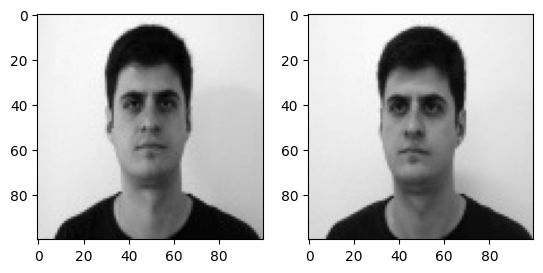

In [6]:
train_data = get_data_dataset("1-13")
test_data = get_data_testset("1-13")
plt.subplot(1,2,1)
plt.imshow(test_data , cmap="gray")
plt.subplot(1,2,2)
plt.imshow(train_data[0] , cmap="gray")

checking permission's

In [7]:
def checking_permission(file_name , get_ans = False):
    test_picture = get_data_testset(file_name)
    all_pictures , all_id = get_all_data()
    singular_values = []
    for p in all_pictures:
        U , S , VT = get_svd(p)
        singular_values.append(S)
    U_test , S_test , VT_test = get_svd(test_picture)
    errors= []
    for S in singular_values:
        error = np.linalg.norm(S_test - S)
        errors.append(error)
    min_index = np.argmin(errors)
    response = False
    if(file_name.split("-")[0] == all_id[min_index].split("-")[0]):
         response = True
    if get_ans  == True:
        return response
    # #########################################################
    print(f"test: {file_name}")
    print(f"predicted_face: {all_id[min_index]}")

    if response == True:
        print("Entry allowed")
        print(errors[min_index])
        plt.subplot(1,2,1)
        plt.imshow(test_picture , cmap= "gray")
        plt.subplot(1,2,2)
        plt.imshow(all_pictures[min_index] , cmap = "gray")
    else:
        print("Entry not allowed")
        print(errors[min_index])
    

test: 9-11.jpg
predicted_face: 9-05.jpg
Entry allowed
141.75622887198887


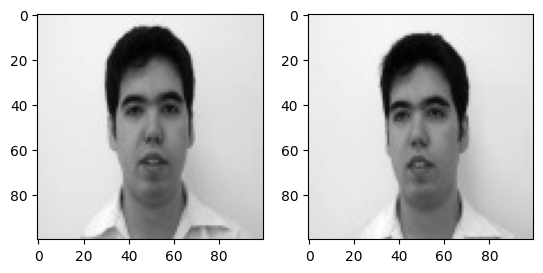

In [8]:
checking_permission("9-11.jpg")

get accuracy function 

In [9]:
def my_accuracy():
    test_data_name =  os.listdir("Testset")
    test_data_name_sorted = sorted(test_data_name , key = lambda x:int(x.split("-")[0]))
    score = 0
    not_allowed_lists = []
    for name  in test_data_name_sorted:
        if(checking_permission(name, get_ans = True) == True):
            score  = score +1
        else:
            not_allowed_lists.append(name)
    return score/len(test_data_name_sorted) , not_allowed_lists

In [10]:
my_accuracy()

(0.7272727272727273,
 ['1-13.jpg',
  '12-13.jpg',
  '24-13.jpg',
  '25-11.jpg',
  '26-13.jpg',
  '33-13.jpg',
  '37-13.jpg',
  '38-13.jpg',
  '44-13.jpg'])

Q1-B

In [17]:
def PCA(file_name,component_number , get_ans = False):
    test_picture = get_data_testset(file_name)
    all_pictures , all_id = get_all_data()
    pca_pictures = []
    for picture in all_pictures:
        # step 1: normalize the picture 
        mean= np.mean(picture , axis =1,dtype=np.float64)
        normalized_picture = picture - mean
        # step 2: covariance of the picture 
        cov_matrix = 1/99 * (normalized_picture @ normalized_picture.T)
        
        eigen_values , eigen_vectors = np.linalg.eig(cov_matrix)
        # sort eig val and derived eig vectors
        sorted_indices = np.argsort(eigen_values)[::-1]
        sorted_eigen_values = eigen_values[sorted_indices]
        sorted_eigen_vectors = eigen_vectors[sorted_indices]
        # step 3: pca of the desired pca's 
        pca = sorted_eigen_vectors[:,:component_number]
        # step 4: project the normalized pic to the pca's and reshape the answear
        reformed_picture = normalized_picture @  pca @ pca.T + mean
        reformed_picture = reformed_picture.reshape(test_picture.shape)
        pca_pictures.append(reformed_picture)
    
    errors= []
    for p in pca_pictures:
      errors.append(np.linalg.norm(p - test_picture))
    min_index = np.argmin(errors)
    response = False
    if(file_name.split("-")[0] == all_id[min_index].split("-")[0]):
         response = True
    if get_ans  == True:
        return response
    # #########################################################
    print(f"test: {file_name}")
    print(f"predicted_face: {all_id[min_index]}")

    if response == True:
        print("Entry allowed")
        print(errors[min_index])
        plt.subplot(1,2,1)
        plt.imshow(test_picture , cmap= "gray")
        plt.subplot(1,2,2)
        plt.imshow(pca_pictures[min_index] , cmap = "gray")    
    else:
        print("Entry not allowed")
        print(errors[min_index])
        # print(singular_values[min_index])
        get_svd(pca_pictures[min_index])

test: 5-13
predicted_face: 5-12.jpg
Entry allowed
1670.6692836248726


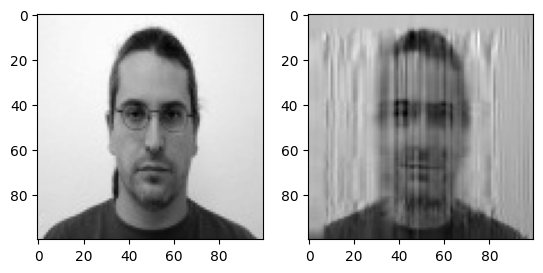

In [12]:
PCA("5-13" , 40)

get pca acuraccy

In [13]:
def my_accuracy_pca(component_number):
    test_data_name =  os.listdir("Testset")
    test_data_name_sorted = sorted(test_data_name , key = lambda x:int(x.split("-")[0]))
    score = 0
    not_allowed_lists = []
    for name  in test_data_name_sorted:
        if(PCA(name,component_number, get_ans = True) == True):
            score  = score +1
        else:
            not_allowed_lists.append(name)
    return score/len(test_data_name_sorted) , not_allowed_lists

In [14]:
my_accuracy_pca(90)

(0.8787878787878788, ['24-13.jpg', '28-12.jpg', '37-13.jpg', '38-13.jpg'])

error rate for diffrent componnet number

In [15]:
score_10  = my_accuracy_pca(10)[0]
score_30  = my_accuracy_pca(30)[0]
score_50  = my_accuracy_pca(50)[0]
score_70  = my_accuracy_pca(70)[0]
score_90  = my_accuracy_pca(90)[0]


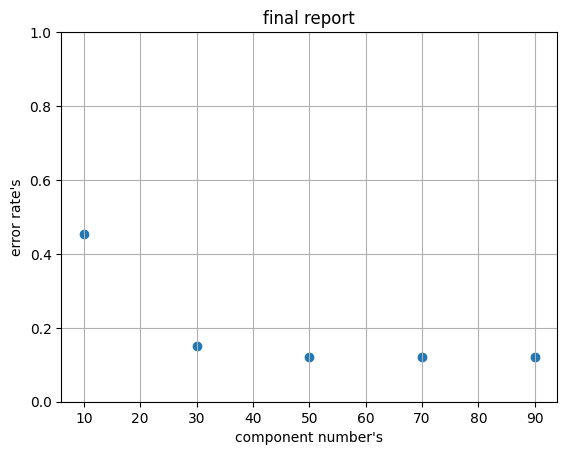

In [16]:
plt.scatter([10,30,50,70,90] , [1-score_10 , 1-score_30 , 1-score_50 , 1-score_70 , 1-score_90])
plt.ylim((0,1))
plt.title("final report")
plt.xlabel("component number's")
plt.ylabel("error rate's")
plt.grid()
plt.show()